# Visualiztion of the audio perturbation pipeline

In [50]:
from data import AudioDataloader, MSPPodcast
from config import load_hydra_config
from models.pitch_encoder import YINEncoder
from data import MelTransform
from IPython.display import Audio
from util.audio import PraatProcessor
import matplotlib.pyplot as plt

cfg = load_hydra_config("vc_xlsr_ph.yaml", overrides=["data.dataset.segment_size=72000"])
dataloader = AudioDataloader(
    dataset=MSPPodcast(cfg.data, split="development"),
    cfg=cfg.data.dataloader,
    batch_size=1,
    shuffle=True,
)
mel_transform = MelTransform(cfg.data.mel_transform)
pitch_encoder = YINEncoder(cfg.model.pitch_encoder)
praat = PraatProcessor(sample_rate=16000)


def plot_mel_yin_audio(x):
    mel = mel_transform(x)
    yin = pitch_encoder(x)
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    plt.imshow(mel[0].cpu().numpy(), aspect="auto", origin="lower")
    plt.colorbar()
    plt.title("Mel spectrogram")
    plt.subplot(3, 1, 2)
    plt.imshow(yin[0].cpu().numpy(), aspect="auto", origin="lower")
    plt.colorbar()
    plt.title("YIN pitch")
    plt.show()
    return Audio(x[0].cpu().numpy(), rate=16000)

x, n_frames = next(iter(dataloader))

## Unperturbed input

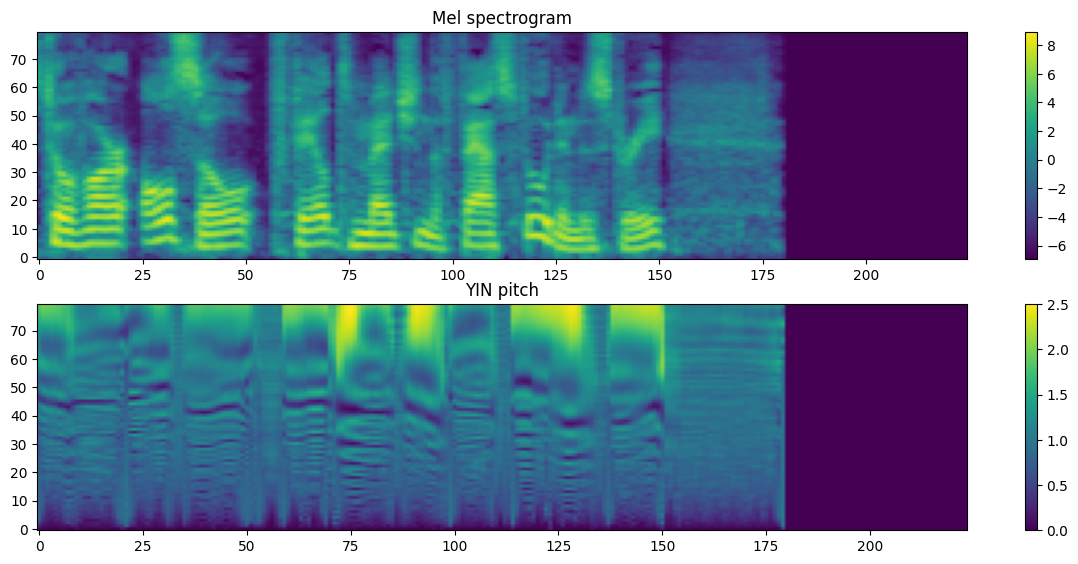

In [42]:
plot_mel_yin_audio(x)

## Pitch input: Formant shifting + Parametric Equalizer

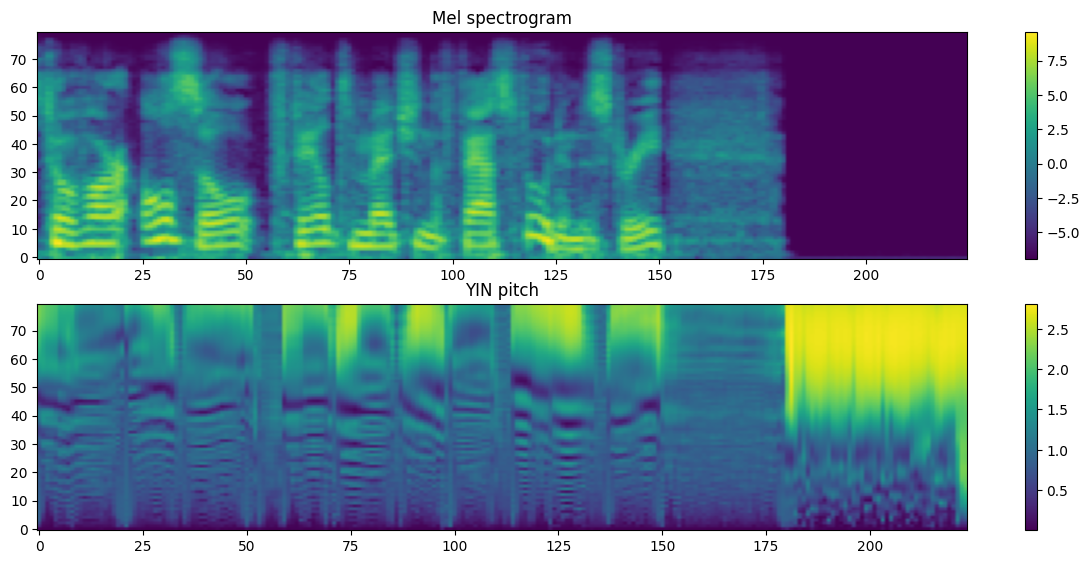

In [49]:
x_g = praat.g_batched(x)
plot_mel_yin_audio(x_g)

## Content input: Formant shifting + Random Frequency Shaping + Parametric Equalizer

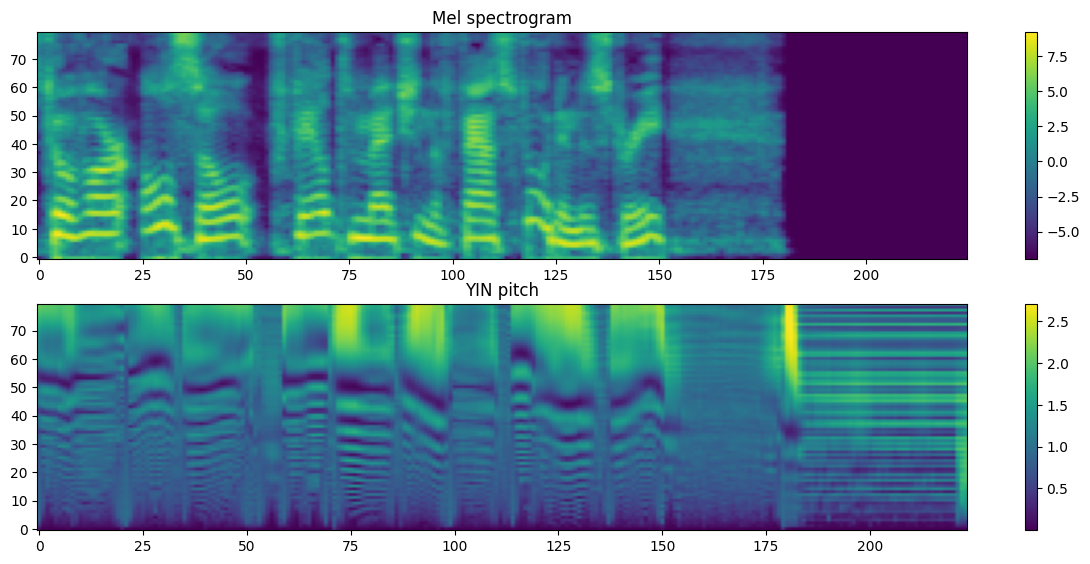

In [48]:
x_f = praat.f_batched(x)
plot_mel_yin_audio(x_f)